In [25]:
import IPython.display as ipd
import matplotlib.pyplot as plt
import torchaudio

## Loading audio files with Librosa

In [26]:
audio_file = "audio/debussy.wav"

In [27]:
ipd.Audio(audio_file)

In [28]:
# load audio files with librosa
debussy_torchaudio, sr_torchaudio = torchaudio.load(audio_file)

## Extracting MFCCs

In [29]:
# total number of samples in audio file
sample_duration = 1 / sr_torchaudio
tot_samples = debussy_torchaudio.size(1)
duration = sample_duration * tot_samples

In [30]:
FRAME_SIZE = 2048 
HOP_LENGTH = 512 
N_MFCC = 13

## Visualising MFCCs

In [31]:
mfcc_transform = torchaudio.transforms.MFCC(sample_rate=sr_torchaudio, n_mfcc=N_MFCC, melkwargs={'n_fft': FRAME_SIZE, 'hop_length': HOP_LENGTH, 'mel_scale': 'slaney'})
mfccs_torchaudio = mfcc_transform(debussy_torchaudio).squeeze(0)

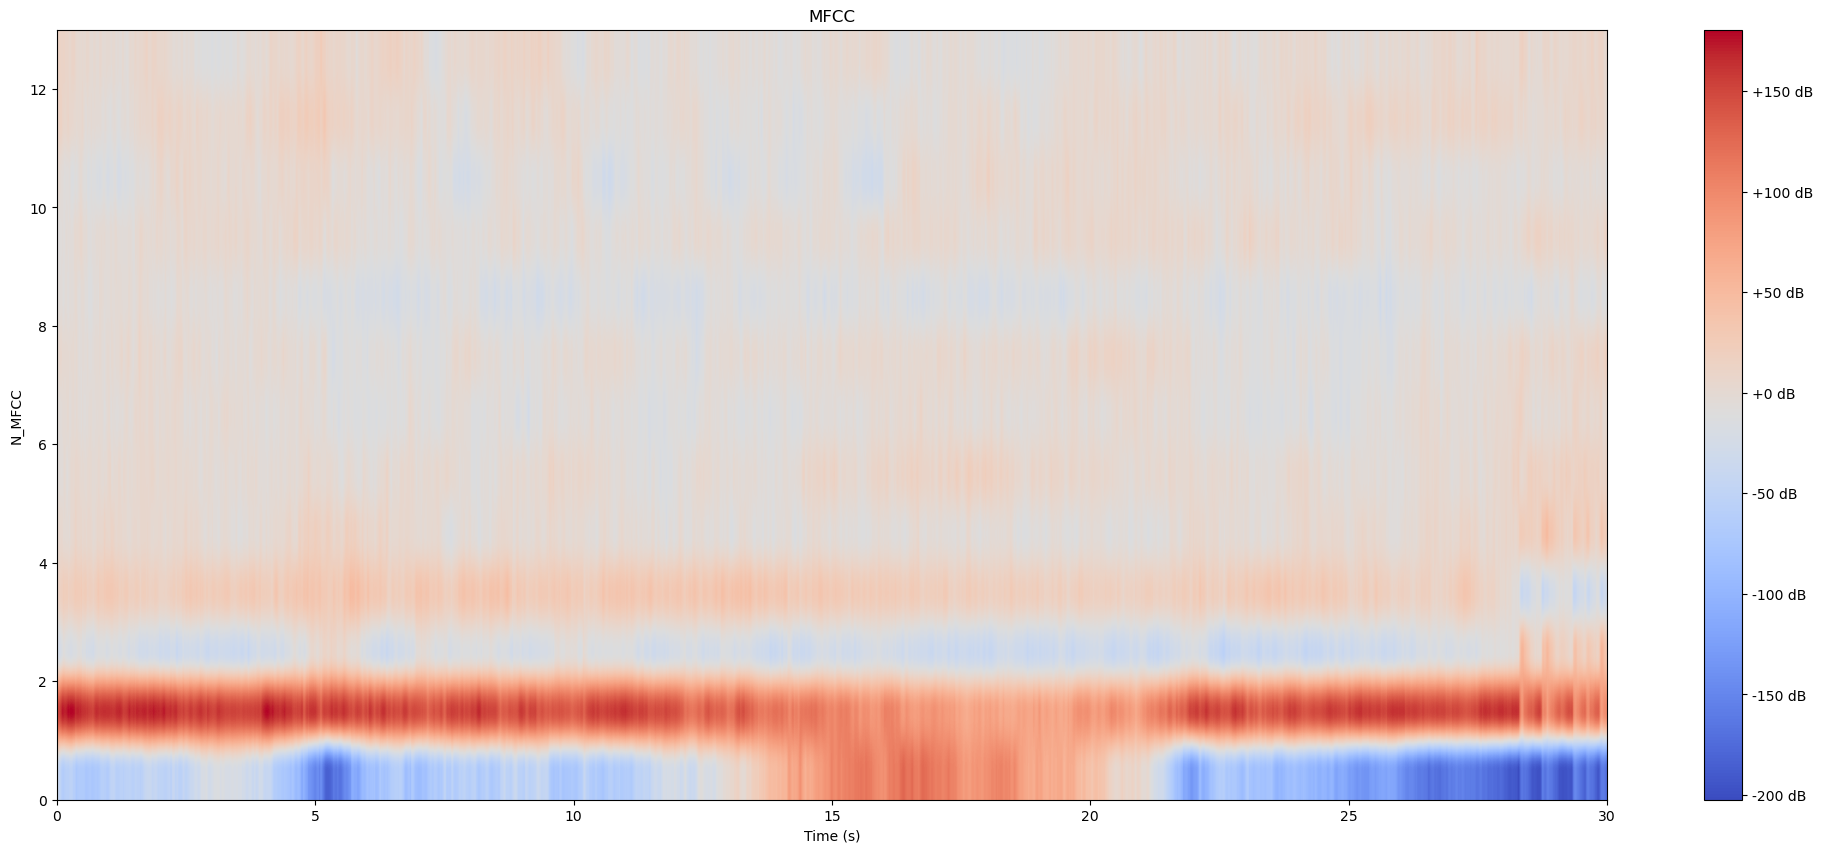

In [32]:
plt.figure(figsize=(25, 10))
plt.imshow(mfccs_torchaudio, aspect='auto', origin='lower', cmap='coolwarm', extent=(0, duration, 0, N_MFCC))
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('N_MFCC')
plt.title('MFCC')
plt.show()

## Computing first / second MFCCs derivatives

In [33]:
delta_transform = torchaudio.transforms.ComputeDeltas(win_length=9)
delta_mfccs_torchaudio = delta_transform(mfccs_torchaudio)
delta2_mfccs_torchaudio = delta_transform(delta_mfccs_torchaudio)

In [34]:
delta_mfccs_torchaudio.shape
delta2_mfccs_torchaudio.shape

torch.Size([13, 1292])

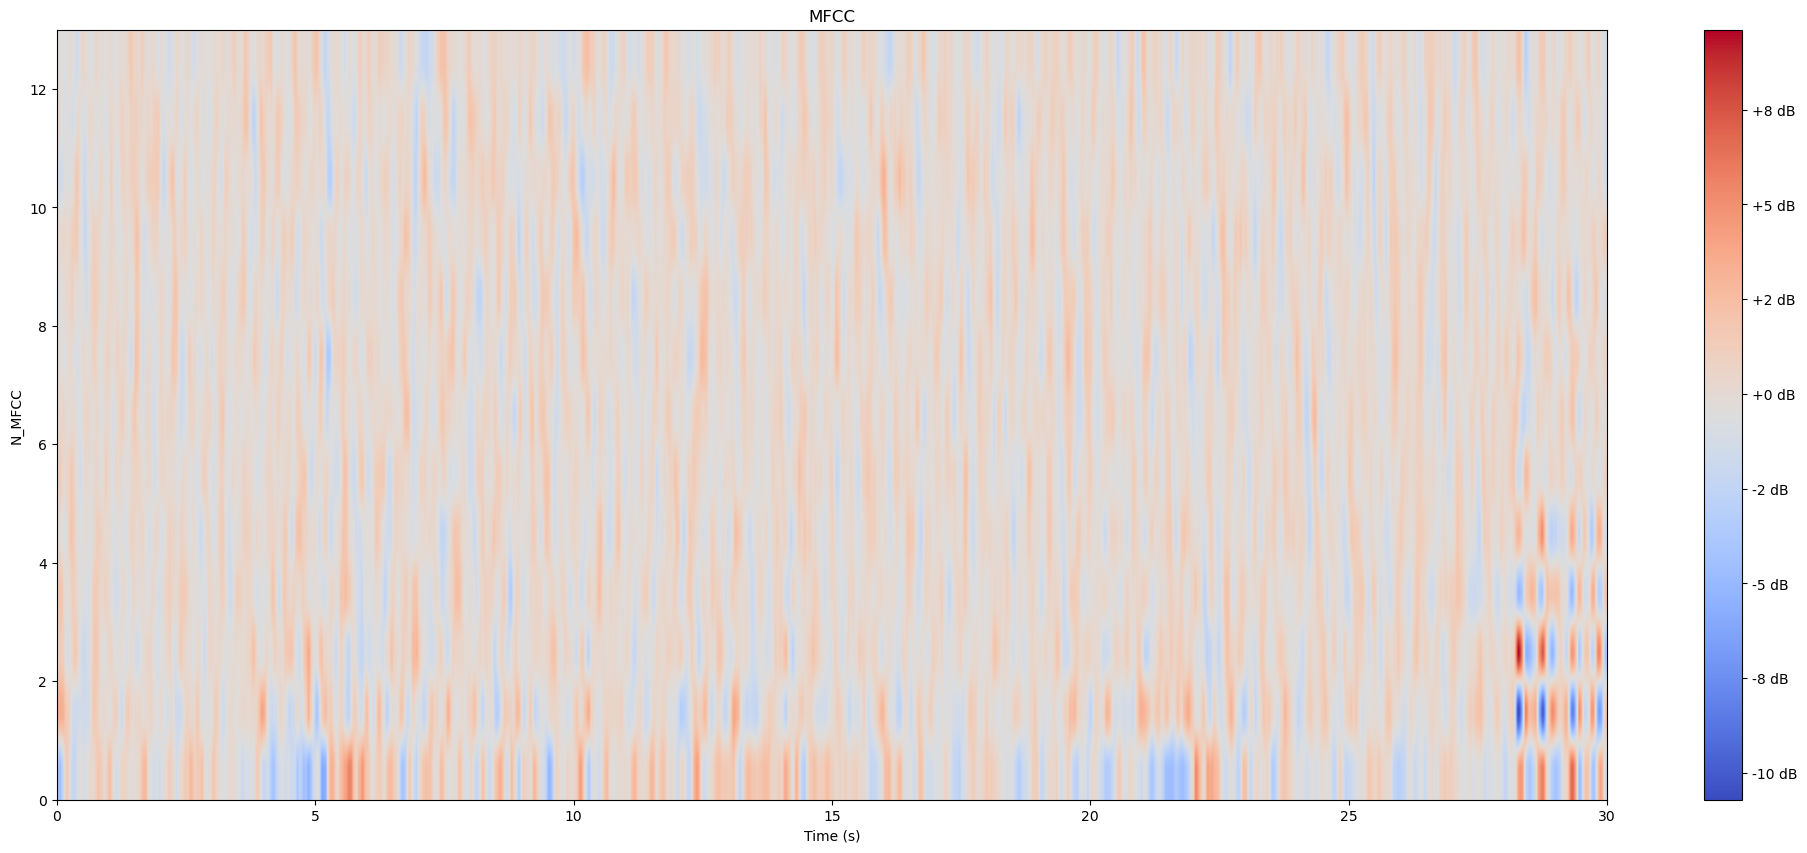

In [35]:
plt.figure(figsize=(25, 10))
plt.imshow(delta_mfccs_torchaudio, aspect='auto', origin='lower', cmap='coolwarm', extent=(0, duration, 0, N_MFCC))
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('N_MFCC')
plt.title('MFCC')
plt.show()

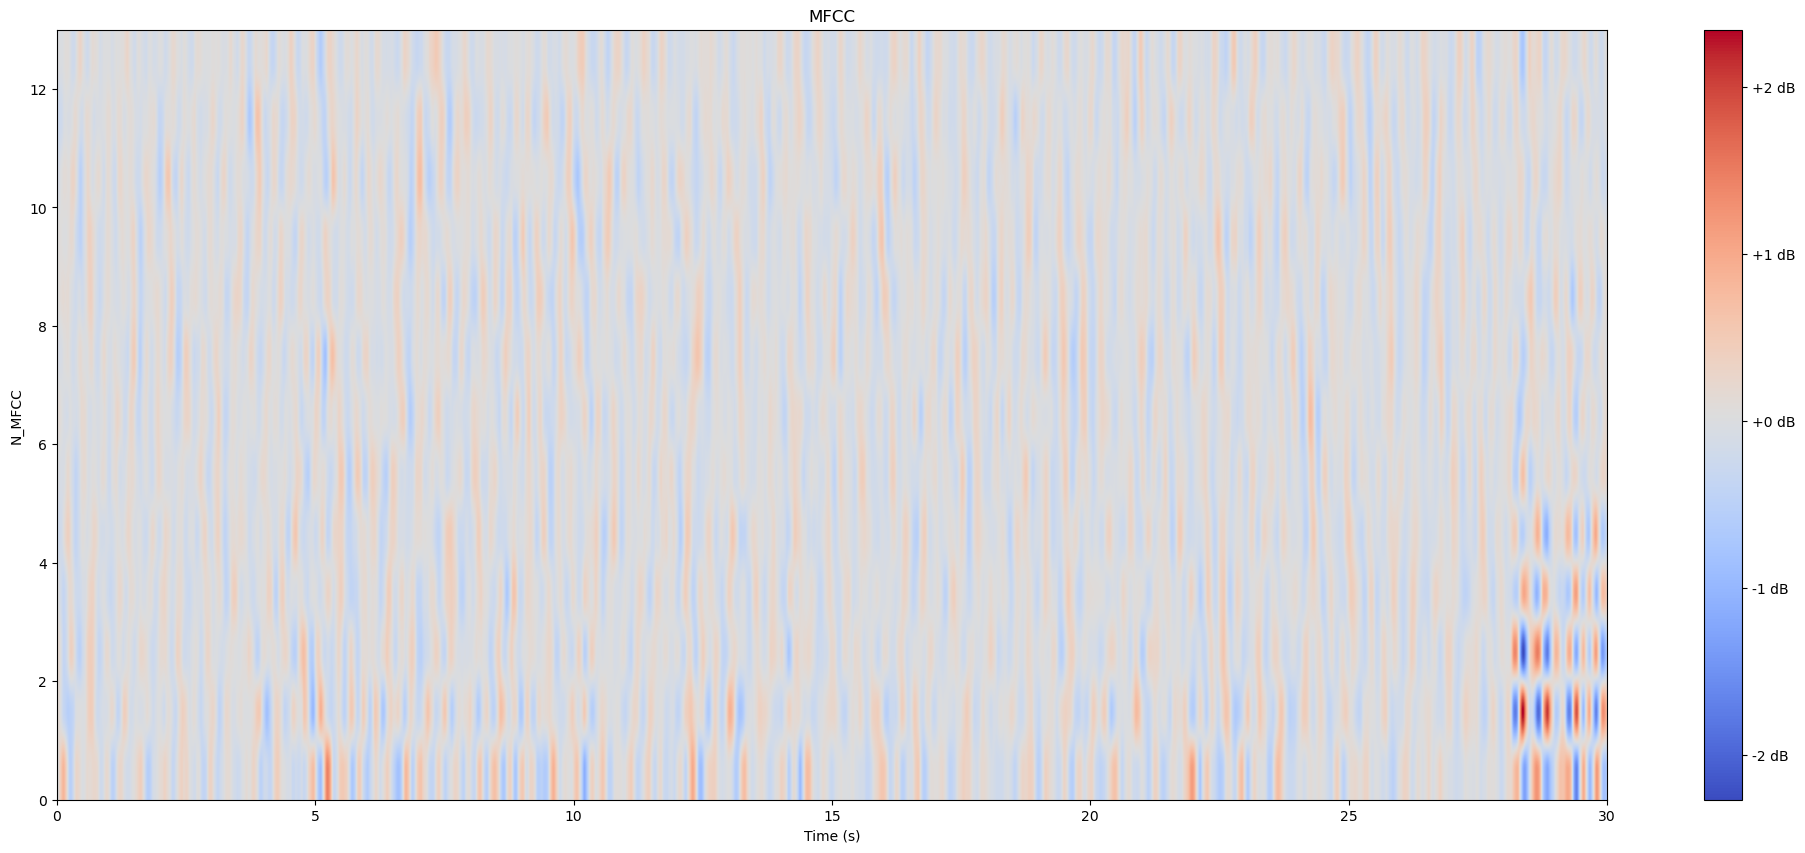

In [36]:
plt.figure(figsize=(25, 10))
plt.imshow(delta2_mfccs_torchaudio, aspect='auto', origin='lower', cmap='coolwarm', extent=(0, duration, 0, N_MFCC))
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('N_MFCC')
plt.title('MFCC')
plt.show()